In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras.regularizers import l2
from tensorflow.keras import backend as K
import tensorflow as tf
import os

In [3]:
from datetime import datetime
from tensorflow.python.framework.ops import disable_eager_execution

disable_eager_execution()

In [4]:
tf.random.set_seed(36)

### Dataset

In [5]:
BASE_DIR_PATH = '../Datasets/typhoons'
TRAIN_PATH = os.path.join(BASE_DIR_PATH, 'train')
VAL_PATH = os.path.join(BASE_DIR_PATH, 'val')
TEST_PATH = os.path.join(BASE_DIR_PATH, 'test')

In [6]:
def load_files(file_path):
    '''
    Loading the files from file_path as pandas DataFrames and combining them
    '''
    file_names = os.listdir(file_path)
    print(file_names)
    
    df = None
    
    for i, file in enumerate(file_names):
        if i == 0:
            df = pd.read_csv(os.path.join(file_path, file))
        else:
            tmp = pd.read_csv(os.path.join(file_path, file))
            df = pd.concat([df, tmp])
    
    return df

In [7]:
train_2016_2017 = load_files(TRAIN_PATH)
train_2016_2017

['ambo_2016.csv', 'auring_2017.csv', 'bising_2017.csv', 'butchoy_2016.csv', 'carina_2016.csv', 'crising_2017.csv', 'dante_2017.csv', 'dindo_2016.csv', 'emong_2017.csv', 'enteng_2016.csv', 'fabian_2017.csv', 'ferdie_2016.csv', 'gener_2016.csv', 'helen_2016.csv', 'igme_2016.csv', 'julian_2016.csv', 'karen_2016.csv', 'lawin_2016.csv', 'marce_2016.csv', 'nina_2016.csv']


,Unnamed: 0,datetime,month,day,hour,t,Station,x,Rainfall_Aries,Rainfall_Boso,Rainfall_Campana,Rainfall_Nangka,Rainfall_Oro,Waterlevel,Discharge,Cross_Section,Velocity,fric_coeff,slope
0,8448,2016-06-26 00:00:00,6,26,0,0.0,Montalban,0,0,0,0,0,0,20.52,8.918747,615.60,0.014488,0.035,0.002000
1,8449,2016-06-26 00:00:00,6,26,0,0.0,Sto_Nino,14420,0,0,0,0,0,11.95,15.963477,788.70,0.020240,0.033,0.000667
2,8450,2016-06-26 01:00:00,6,26,1,3600.0,Montalban,0,0,0,0,0,0,20.52,8.918747,615.60,0.014488,0.035,0.002000
3,8451,2016-06-26 01:00:00,6,26,1,3600.0,Sto_Nino,14420,0,0,0,0,0,11.95,15.963477,788.70,0.020240,0.033,0.000667
4,8452,2016-06-26 02:00:00,6,26,2,7200.0,Montalban,0,0,0,0,0,0,20.51,8.829671,615.30,0.014350,0.035,0.002000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,17323,2016-12-27 21:00:00,12,27,21,421200.0,Sto_Nino,14420,0,0,0,0,0,12.68,36.547660,836.88,0.043671,0.033,0.000667
236,17324,2016-12-27 22:00:00,12,27,22,424800.0,Montalban,0,0,0,0,0,0,21.50,23.628236,645.00,0.036633,0.035,0.002000
237,17325,2016-12-27 22:00:00,12,27,22,424800.0,Sto_Nino,14420,0,0,0,0,0,12.67,36.166567,836.22,0.043250,0.033,0.000667
238,17326,2016-12-27 23:00:00,12,27,23,428400.0,Montalban,0,0,0,0,0,0,21.50,23.628236,645.00,0.036633,0.035,0.002000


In [8]:
val_2016_2017 = load_files(VAL_PATH)
val_2016_2017

['gorio_2017.csv', 'isang_2017.csv', 'jolina_2017.csv', 'kiko_2017.csv', 'lannie_2017.csv', 'nando_2017.csv', 'odette_2017.csv']


,Unnamed: 0,datetime,month,day,hour,t,Station,x,Rainfall_Aries,Rainfall_Boso,Rainfall_Campana,Rainfall_Nangka,Rainfall_Oro,Waterlevel,Discharge,Cross_Section,Velocity,fric_coeff,slope
0,27360,2017-07-25 00:00:00,7,25,0,0.0,Montalban,0,0,0,0,0,0,21.32,19.783987,639.60,0.030932,0.035,0.002000
1,27361,2017-07-25 00:00:00,7,25,0,0.0,Sto_Nino,14420,0,0,0,0,0,12.47,29.190037,823.02,0.035467,0.033,0.000667
2,27362,2017-07-25 01:00:00,7,25,1,3600.0,Montalban,0,0,0,0,0,0,22.37,55.264986,671.10,0.082350,0.035,0.002000
3,27363,2017-07-25 01:00:00,7,25,1,3600.0,Sto_Nino,14420,0,0,0,0,0,12.51,30.490564,825.66,0.036929,0.033,0.000667
4,27364,2017-07-25 02:00:00,7,25,2,7200.0,Montalban,0,0,0,0,1,0,22.72,77.481767,681.60,0.113676,0.035,0.002000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,31339,2017-10-15 21:00:00,10,15,21,421200.0,Sto_Nino,14420,0,0,0,0,0,12.79,40.956736,844.14,0.048519,0.033,0.000667
236,31340,2017-10-15 22:00:00,10,15,22,424800.0,Montalban,0,0,0,0,0,0,21.68,28.202195,650.40,0.043361,0.035,0.002000
237,31341,2017-10-15 22:00:00,10,15,22,424800.0,Sto_Nino,14420,0,0,0,0,0,12.77,40.124861,842.82,0.047608,0.033,0.000667
238,31342,2017-10-15 23:00:00,10,15,23,428400.0,Montalban,0,0,0,0,0,0,21.67,27.926745,650.10,0.042958,0.035,0.002000


In [9]:
test_2016_2017 = load_files(TEST_PATH)
test_2016_2017

['paolo_2017.csv', 'quedan_2017.csv', 'ramil_2017.csv', 'salome_2017.csv', 'tino_2017.csv', 'urduja_2017.csv', 'vinta_2017.csv']


,Unnamed: 0,datetime,month,day,hour,t,Station,x,Rainfall_Aries,Rainfall_Boso,Rainfall_Campana,Rainfall_Nangka,Rainfall_Oro,Waterlevel,Discharge,Cross_Section,Velocity,fric_coeff,slope
0,31344,2017-10-16 00:00:00,10,16,0,0.0,Montalban,0,0,0,0,0,0,21.67,27.926745,650.10,0.042958,0.035,0.002000
1,31345,2017-10-16 00:00:00,10,16,0,0.0,Sto_Nino,14420,0,0,0,0,0,12.74,38.902552,840.84,0.046266,0.033,0.000667
2,31346,2017-10-16 01:00:00,10,16,1,3600.0,Montalban,0,0,0,0,0,0,21.66,27.653933,649.80,0.042558,0.035,0.002000
3,31347,2017-10-16 01:00:00,10,16,1,3600.0,Sto_Nino,14420,0,0,0,0,0,12.71,37.710339,838.86,0.044954,0.033,0.000667
4,31348,2017-10-16 02:00:00,10,16,2,7200.0,Montalban,0,0,0,0,0,0,21.66,27.653933,649.80,0.042558,0.035,0.002000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,20155,2017-02-24 21:00:00,2,24,21,421200.0,Sto_Nino,14420,0,0,0,0,0,11.82,13.565535,780.12,0.017389,0.033,0.000667
236,20156,2017-02-24 22:00:00,2,24,22,424800.0,Montalban,0,0,0,0,0,0,20.95,13.707290,628.50,0.021810,0.035,0.002000
237,20157,2017-02-24 22:00:00,2,24,22,424800.0,Sto_Nino,14420,0,0,0,0,0,11.82,13.565535,780.12,0.017389,0.033,0.000667
238,20158,2017-02-24 23:00:00,2,24,23,428400.0,Montalban,0,0,0,0,0,0,20.95,13.707290,628.50,0.021810,0.035,0.002000


In [10]:
train_2016_2017 = train_2016_2017.sample(frac=1)
val_2016_2017 = val_2016_2017.sample(frac=1)

In [11]:
X_train_2016_2017 = np.array(train_2016_2017[['x', 't', 'fric_coeff', 'slope', 'Rainfall_Aries', 'Rainfall_Boso', 'Rainfall_Campana', 'Rainfall_Nangka', 'Rainfall_Oro']].values.tolist())
X_val_2016_2017 = np.array(val_2016_2017[['x', 't', 'fric_coeff', 'slope', 'Rainfall_Aries', 'Rainfall_Boso', 'Rainfall_Campana', 'Rainfall_Nangka', 'Rainfall_Oro']].values.tolist())
X_test_2016_2017 = np.array(test_2016_2017[['x', 't', 'fric_coeff', 'slope', 'Rainfall_Aries', 'Rainfall_Boso', 'Rainfall_Campana', 'Rainfall_Nangka', 'Rainfall_Oro']].values.tolist())
Y_train_2016_2017 = np.array(train_2016_2017[['Velocity','Waterlevel']].values.tolist())
Y_val_2016_2017 = np.array(val_2016_2017[['Velocity','Waterlevel']].values.tolist())
Y_test_2016_2017 = np.array(test_2016_2017[['Velocity','Waterlevel']].values.tolist())

### Defining evaluation metrics

In [12]:
def r_square(y_true, y_pred):
    x = y_true
    y = y_pred
    mx = K.mean(x, axis=0)
    my = K.mean(y, axis=0)
    xm, ym = x - mx, y - my
    r_num = K.square(K.sum(xm * ym))
    x_square_sum = K.sum(xm * xm)
    y_square_sum = K.sum(ym * ym)
    r_den = (x_square_sum * y_square_sum) + K.epsilon()
    
    r = r_num / r_den
    return r

In [13]:
def NSE(y_true, y_pred):

    y_pred = K.flatten(y_pred)
    y_true = K.flatten(y_true)

    
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [14]:
#PDE Loss Function
def custom_loss(grads_inputs):
    du_dx, du_dt, dh_dx, fric_coeff, slope = grads_inputs[:,0], grads_inputs[:,1], grads_inputs[:,2], grads_inputs[:,3], grads_inputs[:,4]
    g = K.constant(9.8)
    # Create a loss function that adds the MSE loss to the mean of all squared activations of a specific layer
    def loss(y_true,y_pred):
        loss_saint_venant = du_dt + y_pred[:,0] * du_dx + g*dh_dx + g*slope + g*K.square(fric_coeff) * K.square(y_true[:,0])/(K.pow(y_true[:,1], 4/3) + K.epsilon())
        l = K.mean(K.square(loss_saint_venant))

        return 1*l+ K.sum(K.mean(K.square(y_pred - y_true), axis=0))
   
    # Return a function
    return loss

### Defining model

In [15]:
def create_pinn_model(n1, n2, n3):
    lstm_model = tf.keras.models.Sequential([
        tf.keras.layers.Reshape((1, 9), input_shape=(9,)),  # Reshape to 3D
        tf.keras.layers.LSTM(n1, return_sequences=True),
        tf.keras.layers.Flatten(),  # Add Flatten layer to handle dimension mismatch
        tf.keras.layers.Dense(units=n2, activation='relu'),
        tf.keras.layers.Dense(units=n3, activation='relu'),
        tf.keras.layers.Dense(units=2)
    ])

    return lstm_model

## Training Loop

In [16]:
def train_pinn(X_train, Y_train, X_val, Y_val, n1=64, n2=64, n3=64, lr=0.001,
               epochs=20, batch_size=32, patience=2):
    
    # Create and compile model
    model = create_pinn_model(n1, n2, n3)
    
    # Calculate gradients for physics loss
    grads_u = K.gradients(model.output[:,0], model.input)[0]
    grads_h = K.gradients(model.output[:,1], model.input)[0]
    du_dx, du_dt, dh_dx = grads_u[:,0], grads_u[:,1], grads_h[:,0]
    calc_grads_inputs = K.stack(
        (du_dx, du_dt, dh_dx, model.input[:,2], model.input[:,3]), 
        axis=1
    )
    
    # Compile with custom loss
    model.compile(
        optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=lr),
        loss=custom_loss(calc_grads_inputs),
        metrics=['mse', NSE, r_square]
    )
    
    # Train with early stopping
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=patience,
        restore_best_weights=True
    )
    
    history = model.fit(
        X_train, Y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(X_val, Y_val),
        callbacks=[early_stopping],
        verbose=1
    )

    return model, history

In [17]:
model, history = train_pinn(X_train_2016_2017, Y_train_2016_2017, X_val_2016_2017, Y_val_2016_2017)

Train on 3792 samples, validate on 1584 samples
Epoch 1/20
3776/3792 [============================>.] - ETA: 0s - loss: 97.0360 - mse: 48.5177 - NSE: 0.4086 - r_square: 0.1203

C:\Users\neilb\anaconda3\lib\site-packages\keras\src\engine\training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


3792/3792 [==============================] - 9s 2ms/sample - loss: 96.6898 - mse: 48.3446 - NSE: 0.4126 - r_square: 0.1212 - val_loss: 18.2341 - val_mse: 9.1165 - val_NSE: 0.8946 - val_r_square: 0.2317
Epoch 2/20
3792/3792 [==============================] - 2s 547us/sample - loss: 8.9022 - mse: 4.4503 - NSE: 0.9462 - r_square: 0.6545 - val_loss: 4.4477 - val_mse: 2.2229 - val_NSE: 0.9748 - val_r_square: 0.8736
Epoch 3/20
3792/3792 [==============================] - 2s 577us/sample - loss: 2.2605 - mse: 1.1164 - NSE: 0.9865 - r_square: 0.9104 - val_loss: 1.7118 - val_mse: 0.8435 - val_NSE: 0.9903 - val_r_square: 0.9359
Epoch 4/20
3792/3792 [==============================] - 2s 554us/sample - loss: 11.3601 - mse: 5.6777 - NSE: 0.9301 - r_square: 0.5191 - val_loss: 21.1109 - val_mse: 10.5484 - val_NSE: 0.8794 - val_r_square: 0.0846
Epoch 5/20
3792/3792 [==============================] - 3s 827us/sample - loss: 18.2778 - mse: 9.1285 - NSE: 0.8886 - r_square: 0.0984 - val_loss: 19.6790 - va

## Testing

In [22]:
np.set_printoptions(suppress=True)

In [23]:
predictions = model.predict(X_test_2016_2017)
predictions

array([[-0.01874043, 10.980398  ],
       [ 0.03099058, 12.5974245 ],
       [ 0.03135585, 21.575712  ],
       ...,
       [-0.00129596, 13.3879795 ],
       [ 0.03135483, 21.57791   ],
       [-0.00129596, 13.3879795 ]], dtype=float32)

In [24]:
y_pred_h = predictions[:,1]
y_pred_v = predictions[:,0]

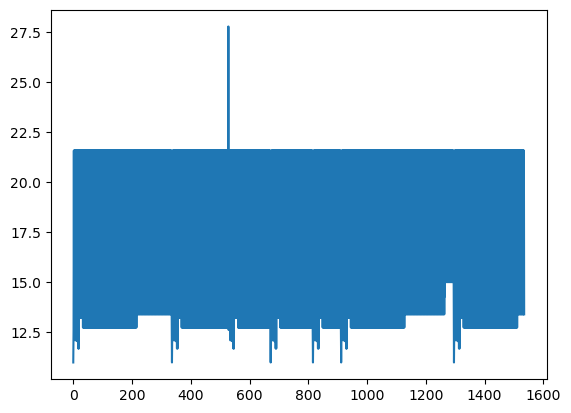

In [25]:
plt.plot(y_pred_h)

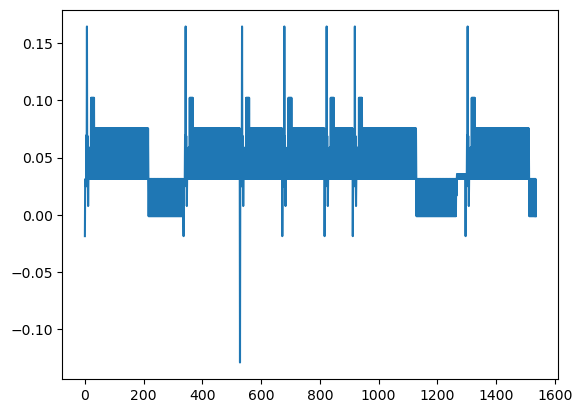

In [26]:
plt.plot(y_pred_v)

--- Stop ---

In [16]:
X_test_2016_2017.shape

(4380, 10)

In [19]:
Y_test_2016_2017

array([[ 0.01888235, 11.89      ],
       [ 0.01844587, 11.87      ],
       [ 0.0180173 , 11.85      ],
       ...,
       [ 0.03440052, 12.44      ],
       [ 0.03440052, 12.44      ],
       [ 0.03440052, 12.44      ]])

In [20]:
y_true_h = Y_test_2016_2017[:,1]
y_true_v = Y_test_2016_2017[:,0]

In [21]:
mse_h = np.mean(np.square(y_true_h - y_pred_h))
mse_v = np.mean(np.square(y_true_v - y_pred_v))

mse_h, mse_v

(0.32846772676671043, 0.0017727264578701)

In [22]:
(mse_h + mse_v)/2

0.16512022661229026

In [23]:
SS_res_h = np.sum(np.square(y_true_h - y_pred_h)) 
SS_tot_h = np.sum(np.square(y_true_h - np.mean(y_true_h)))

NSE_h = 1 - SS_res_h/(SS_tot_h)
NSE_h

-0.0579383618526601

In [24]:
SS_res_v = np.sum(np.square(y_true_v - y_pred_v)) 
SS_tot_v = np.sum(np.square(y_true_v - np.mean(y_true_v)))

NSE_v = 1 - SS_res_v/(SS_tot_v)
NSE_v

-0.04993967642249375

In [25]:
np.savetxt('pinn_predictions.csv', y_pred_h, delimiter=',', fmt='%.4f')